# Analysis Outline:

In this project Corpus text file is analyzed using Random Forest. Preprocessing of text data involves transforming raw data into an understandable format for NLP models. 
1. Data cleaning and changing all the text content to lower case.
2. Tokenization to  break a stream of text into words, phrases, symbols, or other meaningful elements called tokens. The list of tokens becomes input for further processing.
3. Removing Punctuation and Stopwords
4. Word Lemmatization to reduce the inflectional forms of each word into a common base or root.
5. Word Vectorization using word count and TFIDF to turn a collection of text documents into numerical feature vectors
6. Feature Engineering
7. Adding new features to features
8. Splitting data into Train and Test datasets
9. Encoding labels to transform Categorical data of string type in the data set into numerical values which the model can understand.
10. Fitting Random Forest algorithm and optimizing the hyper parameters

In [3]:
import pandas as pd
import numpy as np
import re
import string

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection, naive_bayes, svm

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras import regularizers
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt

from collections import defaultdict


In [4]:
print(tf.__version__)

2.0.0


In [4]:
np.random.seed(500)

In [5]:
Corpus = pd.read_csv("corpus.csv",encoding='latin-1')

In [6]:
#Checking if there is any blank rows
Corpus.isna().sum()

text     0
label    0
dtype: int64

In [7]:
Corpus.label.nunique()

2

In [8]:
Corpus.dtypes

text     object
label    object
dtype: object

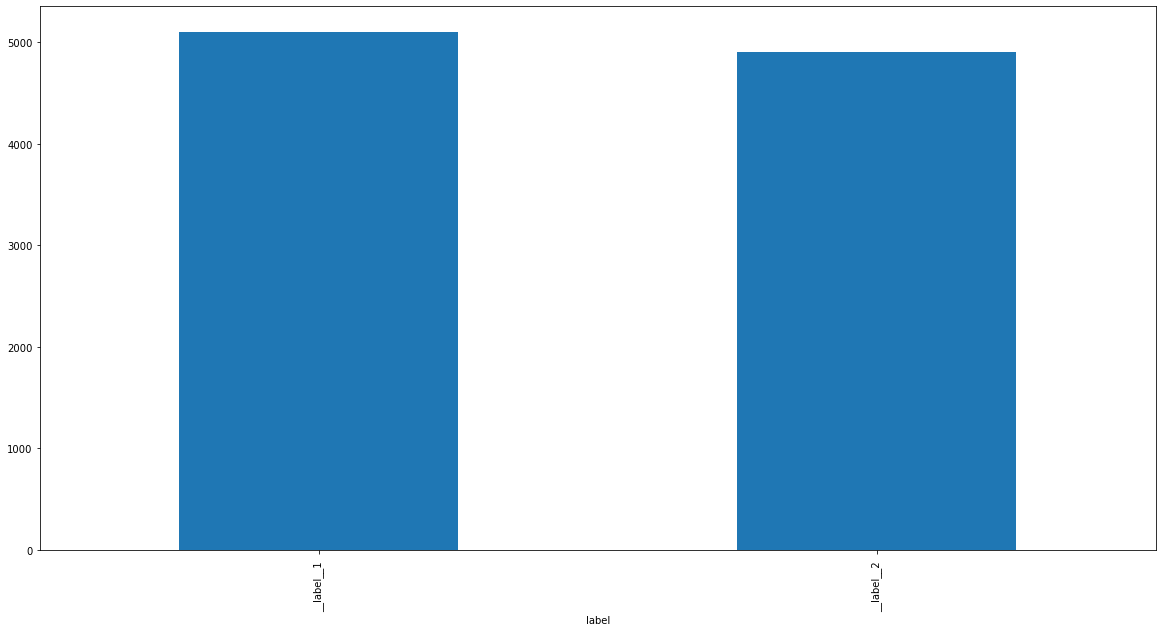

In [10]:
Corpus.groupby('label').text.count().plot(kind='bar',stacked=True, figsize=(20,10))

Based on the graph above, our data set is very balanced.

In [9]:
#Change all the text to lower case
Corpus = Corpus.applymap(lambda s:s.lower())

In [10]:
#Tokenization : In this each entry in the corpus will be broken into set of words
Corpus['tokenized_text']= [word_tokenize(entry) for entry in Corpus['text']]

In [11]:
#Remove Puctuation
def remove_punct (text):
    text_nopunct = [char for char in text if char.isalpha()]
    return text_nopunct
Corpus['no_punct'] = Corpus['tokenized_text'].apply(lambda x : remove_punct(x))

In [12]:
Corpus.head()

,text,label,tokenized_text,no_punct
0,stuning even for the non-gamer: this sound tr...,__label__2,"[stuning, even, for, the, non-gamer, :, this, ...","[stuning, even, for, the, this, sound, track, ..."
1,the best soundtrack ever to anything.: i'm re...,__label__2,"[the, best, soundtrack, ever, to, anything, .,...","[the, best, soundtrack, ever, to, anything, i,..."
2,amazing!: this soundtrack is my favorite musi...,__label__2,"[amazing, !, :, this, soundtrack, is, my, favo...","[amazing, this, soundtrack, is, my, favorite, ..."
3,excellent soundtrack: i truly like this sound...,__label__2,"[excellent, soundtrack, :, i, truly, like, thi...","[excellent, soundtrack, i, truly, like, this, ..."
4,"remember, pull your jaw off the floor after h...",__label__2,"[remember, ,, pull, your, jaw, off, the, floor...","[remember, pull, your, jaw, off, the, floor, a..."


In [13]:
# Remove Stop Words
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords (words_list):
    text = [word for word in words_list if word not in stopword]
    return text
Corpus['text_nostop'] = Corpus ['no_punct'].apply(lambda x: remove_stopwords (x))

In [14]:
Corpus.head()

,text,label,tokenized_text,no_punct,text_nostop
0,stuning even for the non-gamer: this sound tr...,__label__2,"[stuning, even, for, the, non-gamer, :, this, ...","[stuning, even, for, the, this, sound, track, ...","[stuning, even, sound, track, beautiful, paint..."
1,the best soundtrack ever to anything.: i'm re...,__label__2,"[the, best, soundtrack, ever, to, anything, .,...","[the, best, soundtrack, ever, to, anything, i,...","[best, soundtrack, ever, anything, reading, lo..."
2,amazing!: this soundtrack is my favorite musi...,__label__2,"[amazing, !, :, this, soundtrack, is, my, favo...","[amazing, this, soundtrack, is, my, favorite, ...","[amazing, soundtrack, favorite, music, time, h..."
3,excellent soundtrack: i truly like this sound...,__label__2,"[excellent, soundtrack, :, i, truly, like, thi...","[excellent, soundtrack, i, truly, like, this, ...","[excellent, soundtrack, truly, like, soundtrac..."
4,"remember, pull your jaw off the floor after h...",__label__2,"[remember, ,, pull, your, jaw, off, the, floor...","[remember, pull, your, jaw, off, the, floor, a...","[remember, pull, jaw, floor, hearing, played, ..."


In [15]:
#Lemmatizing 
wn = nltk.WordNetLemmatizer()
def lemmatizing (tockenized_text):
    text = [wn.lemmatize(word) for word in tockenized_text]
    return text
Corpus['text_lemmatized'] = Corpus['text_nostop'].apply(lambda x: lemmatizing(x))

In [16]:
pd.set_option('display.max_colwidth',100)
Corpus.head()

,text,label,tokenized_text,no_punct,text_nostop,text_lemmatized
0,stuning even for the non-gamer: this sound track was beautiful! it paints the senery in your mi...,__label__2,"[stuning, even, for, the, non-gamer, :, this, sound, track, was, beautiful, !, it, paints, the, ...","[stuning, even, for, the, this, sound, track, was, beautiful, it, paints, the, senery, in, your,...","[stuning, even, sound, track, beautiful, paints, senery, mind, well, would, recomend, even, peop...","[stuning, even, sound, track, beautiful, paint, senery, mind, well, would, recomend, even, peopl..."
1,the best soundtrack ever to anything.: i'm reading a lot of reviews saying that this is the bes...,__label__2,"[the, best, soundtrack, ever, to, anything, ., :, i, 'm, reading, a, lot, of, reviews, saying, t...","[the, best, soundtrack, ever, to, anything, i, reading, a, lot, of, reviews, saying, that, this,...","[best, soundtrack, ever, anything, reading, lot, reviews, saying, best, soundtrack, figured, wri...","[best, soundtrack, ever, anything, reading, lot, review, saying, best, soundtrack, figured, writ..."
2,"amazing!: this soundtrack is my favorite music of all time, hands down. the intense sadness of ...",__label__2,"[amazing, !, :, this, soundtrack, is, my, favorite, music, of, all, time, ,, hands, down, ., the...","[amazing, this, soundtrack, is, my, favorite, music, of, all, time, hands, down, the, intense, s...","[amazing, soundtrack, favorite, music, time, hands, intense, sadness, prisoners, fate, means, pl...","[amazing, soundtrack, favorite, music, time, hand, intense, sadness, prisoner, fate, mean, playe..."
3,excellent soundtrack: i truly like this soundtrack and i enjoy video game music. i have played ...,__label__2,"[excellent, soundtrack, :, i, truly, like, this, soundtrack, and, i, enjoy, video, game, music, ...","[excellent, soundtrack, i, truly, like, this, soundtrack, and, i, enjoy, video, game, music, i, ...","[excellent, soundtrack, truly, like, soundtrack, enjoy, video, game, music, played, game, music,...","[excellent, soundtrack, truly, like, soundtrack, enjoy, video, game, music, played, game, music,..."
4,"remember, pull your jaw off the floor after hearing it: if you've played the game, you know how...",__label__2,"[remember, ,, pull, your, jaw, off, the, floor, after, hearing, it, :, if, you, 've, played, the...","[remember, pull, your, jaw, off, the, floor, after, hearing, it, if, you, played, the, game, you...","[remember, pull, jaw, floor, hearing, played, game, know, divine, music, every, single, song, te...","[remember, pull, jaw, floor, hearing, played, game, know, divine, music, every, single, song, te..."


In [19]:
wn.lemmatize('geese')

'goose'

In [17]:
# Vectorization using Count Vectorization
count_vect = CountVectorizer(analyzer=lemmatizing)
X_counts = count_vect.fit_transform(Corpus['text_lemmatized'])

In [21]:
#Vectorizers output Sparse Matrix. To view zero values as well:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.columns = count_vect.get_feature_names()

In [22]:
# Vectorization using TFIDF
tfidf_vect = TfidfVectorizer(analyzer=lemmatizing)
X_tfidf = tfidf_vect.fit_transform(Corpus['text_lemmatized'])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()

# Feature Engineering

Hypotheses:
1. Percentage of punctuation used in a text
2. text length
3. Percentage of repeated alphabets in each word of each text
4. Max length of words in each text

In [18]:
def count_punct (text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

In [19]:
#1. Percentage of punctuation used in a text
Corpus['punct%'] = Corpus ['text'].apply(lambda x: count_punct(x))

In [20]:
#2. text length
Corpus ['body_len'] = Corpus['text'].apply(lambda x: len(x)-x.count(" "))

In [21]:
#3. Percentage of repeated alphabets in each word of each text
def repeated_ratio(text):
    count = sum(1 for char in text if text.count(char) == 1)
    return round (count/(len(text)-text.count(" ")),3)*100
Corpus['repeated%'] = Corpus['text_lemmatized'].apply(lambda x: repeated_ratio(x))

In [22]:
#4. Max length of words in each text
def max_length(text):
    length = max(len(char) for char in text)
    return length
Corpus['max_word_length'] = Corpus['text_lemmatized'].apply(lambda x: max_length(x))

In [23]:
Corpus.label.unique()

array(['__label__2 ', '__label__1 '], dtype=object)

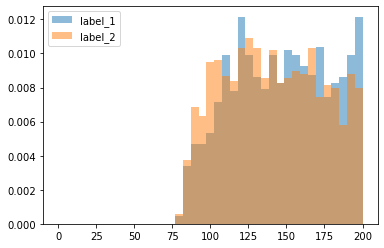

In [29]:
from matplotlib import pyplot
bins = np.linspace(0,200,40)
pyplot.hist(Corpus[Corpus['label']=='__label__1 ']['body_len'], bins, alpha=0.5, density=True, label='label_1')
pyplot.hist(Corpus[Corpus['label']=='__label__2 ']['body_len'], bins, alpha=0.5, density=True, label='label_2')
pyplot.legend(loc='upper left')
pyplot.show()

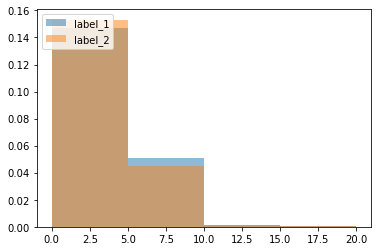

In [31]:
bins = np.linspace(0,20,5)
pyplot.hist(Corpus[Corpus['label']=='__label__1 ']['punct%'], bins, alpha=0.5, density=True, label='label_1')
pyplot.hist(Corpus[Corpus['label']=='__label__2 ']['punct%'], bins, alpha=0.5, density=True, label='label_2')
pyplot.legend(loc='upper left')
pyplot.show()

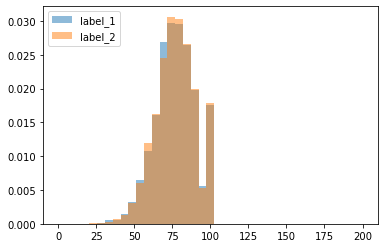

In [97]:
bins = np.linspace(0,200,40)
pyplot.hist(Corpus[Corpus['label']=='__label__1 ']['repeated%'], bins, alpha=0.5, density=True, label='label_1')
pyplot.hist(Corpus[Corpus['label']=='__label__2 ']['repeated%'], bins, alpha=0.5, density=True, label='label_2')
pyplot.legend(loc='upper left')
pyplot.show()

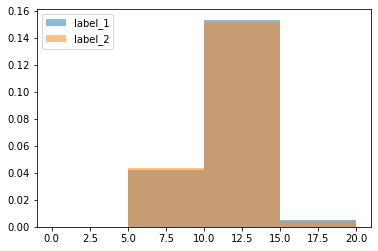

In [98]:
bins = np.linspace(0,20,5)
pyplot.hist(Corpus[Corpus['label']=='__label__1 ']['max_word_length'], bins, alpha=0.5, density=True, label='label_1')
pyplot.hist(Corpus[Corpus['label']=='__label__2 ']['max_word_length'], bins, alpha=0.5, density=True, label='label_2')
pyplot.legend(loc='upper left')
pyplot.show()

Among the above feature, none of them have clearly separated label_1 and label_2. However, body length is able to separate the labels better than other features. We can see that label_1 tends to have longer length and label_2 tends to have shorter length. In following, I will just add these features to the model and test their importance.

## Adding new features to our dataset (TFIDF vectorized features)

In [30]:
X_features = pd.concat([Corpus['body_len'], Corpus['punct%'], Corpus['repeated%'],Corpus['max_word_length'], pd.DataFrame(X_tfidf.toarray())],axis=1)

In [29]:
X_features.head()

,body_len,punct%,repeated%,max_word_length,0,1,2,3,4,5,...,26576,26577,26578,26579,26580,26581,26582,26583,26584,26585
0,348,2.9,73.8,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,413,3.4,86.4,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,632,6.3,73.1,14,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,626,5.3,58.8,14,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,395,5.6,82.6,11,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Prepare Test and Train Datasets

In [31]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(X_features,Corpus['label'],test_size=0.3)

# Encoding
Label encode the target variable — This is done to transform Categorical data of string type in the data set into numerical values which the model can understand.

In [32]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

# Fitting Random Forest 

In [33]:
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(Train_X, Train_Y)
sorted(zip(rf_model.feature_importances_,X_features.columns),reverse=True)[0:10]

[(0.03285566590460781, 10270),
 (0.025980478305212815, 25707),
 (0.019338568833065492, 13947),
 (0.018104950162676242, 15170),
 (0.01632316859289032, 26254),
 (0.013934294541218506, 2693),
 (0.009128985790861695, 8110),
 (0.00808905597891536, 6518),
 (0.0077539168992256866, 20462),
 (0.007576664783608616, 11230)]

In [34]:
rf = RandomForestClassifier()
param = {'n_estimators':[10,150,300],'max_depth':[30,60,90,None]}
gs = GridSearchCV(rf,param,cv=5,n_jobs=-1)
gs_fit=gs.fit(X_features,Corpus['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,340.392715,32.045014,1.859203,0.234246,None,300,"{'max_depth': None, 'n_estimators': 300}",0.8425,0.8070,0.8240,0.8160,0.8310,0.8241,0.012200,1
8,258.386798,2.466896,1.710200,0.065270,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.8380,0.8040,0.8255,0.8155,0.8335,0.8233,0.012315,2
10,166.266413,3.994615,1.465601,0.067928,None,150,"{'max_depth': None, 'n_estimators': 150}",0.8415,0.8060,0.8215,0.8110,0.8265,0.8213,0.012452,3
5,150.133797,6.830009,1.159401,0.184972,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.8325,0.8035,0.8255,0.8090,0.8300,0.8201,0.011659,4
7,121.093999,9.185976,1.344801,0.086678,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.8390,0.7965,0.8145,0.8165,0.8330,0.8199,0.014998,5


In [35]:
rf = RandomForestClassifier(n_estimators=300, max_depth=None, n_jobs=-1)
rf_model = rf.fit(Train_X, Train_Y)
sorted(zip(rf_model.feature_importances_,X_features.columns),reverse=True)[0:10]

[(0.020919635354321935, 10270),
 (0.011807340952053456, 25707),
 (0.010338830529841017, 13947),
 (0.008061483051962125, 1789),
 (0.00797312010122389, 15170),
 (0.007026645068681319, 26254),
 (0.007017435794218015, 2693),
 (0.006891443262533185, 'body_len'),
 (0.00667108801871055, 'punct%'),
 (0.006609956287935395, 6518)]

# Fitting Random Forest to Count Vectorized Features

In [24]:
X_features_counts = pd.concat([Corpus['body_len'], Corpus['punct%'], Corpus['repeated%'],Corpus['max_word_length'], pd.DataFrame(X_counts.toarray())],axis=1)

In [25]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(X_features_counts,Corpus['label'],test_size=0.3)

In [26]:
rf = RandomForestClassifier()
param = {'n_estimators':[10,150,300],'max_depth':[30,60,90,None]}
gs = GridSearchCV(rf,param,cv=5,n_jobs=-1)
gs_fit=gs.fit(X_features_counts,Corpus['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,330.578011,14.371861,2.185394,1.140484,None,300,"{'max_depth': None, 'n_estimators': 300}",0.8410,0.8170,0.8270,0.8215,0.8400,0.8293,0.009683,1
8,331.942850,20.097919,2.043308,0.681391,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.8400,0.8085,0.8300,0.8200,0.8375,0.8272,0.011656,2
7,168.044163,3.008715,1.671691,0.153912,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.8440,0.8030,0.8250,0.8180,0.8325,0.8245,0.013777,3
10,180.301598,3.049264,2.228999,1.553728,None,150,"{'max_depth': None, 'n_estimators': 150}",0.8375,0.8130,0.8215,0.8210,0.8260,0.8238,0.008029,4
5,289.995662,26.612957,1.726197,0.107699,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.8405,0.8065,0.8185,0.8160,0.8365,0.8236,0.012870,5


In [28]:
rf = RandomForestClassifier(n_estimators=300, max_depth=None, n_jobs=-1)
rf_model = rf.fit(Train_X, Train_Y)
sorted(zip(rf_model.feature_importances_,X_features_counts.columns),reverse=True)[0:10]

[(0.01866217456339713, 10270),
 (0.009790392891559502, 25707),
 (0.009518795565816963, 15170),
 (0.008900947494427271, 'body_len'),
 (0.00848093437338835, 13947),
 (0.00801365085268645, 'punct%'),
 (0.007653024571793295, 26254),
 (0.007264173052821993, 'repeated%'),
 (0.007157174204820287, 2693),
 (0.0069258422321076575, 1789)]

Based on the results for TFIDF vectorized and count vectorized features, fitting time for both of them are long. 
The highest test accuracy (mean_test_score) using TFID was 0.82 and for count vectorized was almost 0.83. These highest values was achieved by using 300 estimators and no limit of max_depth for both of them. Also, we can see that single features (words) or created features have a small importance to the model (maximum of around 0.02).